# Урок 6.1. Предиктивный анализ: задачи регрессии и классификации

Сначала мы описывали имеющиеся у нас данные, изучали особенности и закономерности. Затем мы научились на основе данных делать выводы о генеральной совокупности, из которой они были получены. **В этом уроке мы научимся делать прогнозы**, то есть использовать собранные данные и выявленные закономерности для предсказания будущих событий, трендов или результатов в генеральной совокупности.

Цель урока: Научиться делать прогнозы с помощью **линейной и логистической регрессий**.

Переменную, которую хотят оценить, называют **объясняемой, зависимой или целевой переменной**. А переменные, на основании которых хотят оценить целевую переменную, называют **объясняющими или независимыми**. В примере с квартирами зависимой переменной будет цена, а независимыми — площадь, число комнат, удаленность от метро и др.

Важная задача аналитика правильно подобрать незаисимые переменные для построение модели и корректно интерпретировать полученные результаты.
Например, если один параметр коррелирует с другим, то есть рост одного показателя сопровождается ростом другого и наоборот, кажется, что один из них непосредственно влияет на другой.

Если имеется большой набор данных, то не составит труда обнаружить сильную корреляцию между несколькими признаками. Поэтому важно критично относиться к собственным выводам. Чем больше данных высокого качества у нас есть, тем более точно мы можем проверять наши гипотезы и строить прогнозы.

При построении прогнозов выделяют две группы задач:
- Задачи **регрессии**  
В таких задачах основной целью является **прогноз некоторого числового значения** на основании имеющихся признаков. Например, оценка стоимости объекта, прогноз курса валюты, предсказание объема продаж или выручки.
- Задачи **классификации**  
В таких задачах основной целью является **прогноз некоторого качественного значения**, то есть необходимо отнести объект к определенному **классу или категории**. Например, классификация заемщика на «надежного» или «ненадежного», определение письма в спам, разделение изделий на «бракованные» или «качественные».

## Линейная регрессияv
Задачи **предсказания некоторой числовой** метрики можно решать при помощи линейной регрессии.

Линейная регрессия — самый простой вариант регрессии. Мы можем использовать линейную регрессию, если предполагаем, что между прогнозируемой величиной Y и переменными (характеристиками) X есть линейная зависимость. Другими словами, при изменении одного из параметров другой меняется по линейному закону. При этом каждая переменная имеет свой вес, который умножается на значение этой переменной и далее суммируется.

# библиотека scikit-learn, «‎sklearn»   (SciPy Toolkit)
Она предоставляет множество инструментов и алгоритмов для задач классификации, регрессии и многих других задач машинного обучения и статистического анализа данных.  
- Простота использования  
Scikit-learn предоставляет простой и интуитивно понятный интерфейс для работы с алгоритмами машинного обучения. Это делает его идеальным выбором для начинающих и опытных аналитиков данных.
- Большое сообщество и поддержка  
Scikit-learn имеет активное сообщество пользователей и разработчиков, что означает, что можно легко найти помощь и ресурсы в Интернете, если у вас возникают вопросы или проблемы.
- Богатый выбор алгоритмов  
Библиотека содержит множество алгоритмов машинного обучения и методов анализа данных, позволяя выбирать наиболее подходящие методы для конкретной задачи.
- Интеграция с другими библиотеками  
Scikit-learn хорошо интегрируется с другими популярными библиотеками для анализа данных, такими как **NumPy, Pandas и Matplotlib**, что упрощает анализ и визуализацию данных.
- Открытый исходный код  
Scikit-learn является проектом с открытым исходным кодом, что позволяет пользователям адаптировать его под свои нужды и внедрять в собственные проекты без ограничений.  


альтернативы
- TensorFlow и PyTorch  
Эти библиотеки предоставляют более широкий набор инструментов для создания и обучения глубоких моделей.
- XGBoost и LightGBM  
Эти библиотеки специализируются на градиентном бустинге (техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме комбинации слабых предсказывающих моделей, обычно деревьев решений) и обладают большой производительностью в задачах классификации и регрессии.

In [ ]:
pip install -U scikit-learn

Импортируем **класс реализации линейной регрессии** из библиотеки scikit-learn и **создадим модель линейной регрессии**, которую мы будем использовать **для обучения и прогнозирования**

In [ ]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
df=pd.read_csv('Lesson_4_insurance.csv')

In [ ]:
#Затем определим независимые и зависимые переменные (X и Y):
X = df[["Average_Visitors", "Average_Order_Value", "Humidity", "Workers"]]
Y = df["Daily_Profit"]

In [ ]:
##Определим количество столбцов и строк в Х:
X.shape
--> (19000, 4)

Далее нам необходимо разделить данные на обучающую и тестовую выборки.  
Обычно это делают в пропорции  70/30, 75/25  или 80/20. 

Для оценки качества модели есть и более продвинутый способ — **кросс-валидация**. При его использовании мы разделяем данные несколько раз и каждый раз берем разные части данных для обучения и проверки, а полученные результаты усредняем.  
Таким образом, разница между жестким разделением на тестовую и обучающую выборки и кросс-валидацией заключается в том, что кросс-валидация выполняет множество тестов на разных наборах данных. Кросс-валидация более надежна, но требует больше времени и вычислительных ресурсов.

In [ ]:
#В нашей задаче мы ограничимся стандартным делением выборки на обучающую и тестовую в пропорции 70/30.
test_split_index = int(X.shape[0]*0.7)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

In [ ]:
#Обучим модель с использованием метода fit():
model.fit(X_train, Y_train)
#Рассчитаем Y для тестовой выборки:
Y_predicted = model.predict(X_test)
print(Y_predicted)

In [ ]:
В результате у нас получается массив с предсказанными значениями Y:
[43587.08281938  64814.43197401  39219.26744681 ...  20968.01390973
66198.96127899 156276.92434464]

Теперь, как заявлялось ранее, нам необходимо **проверить нашу модель**. Для оценки **прогноза есть свои метрики**, сравнивающие **нашу модель и реальные выборки**.

**Метрики оценки прогноза**  
В данном уроке мы рассмотрим самые популярные метрики:   
- **MSE**  
- **MAE**  
- **коэффициент детерминации R²**  

**MSE — среднеквадратичная ошибка**  
Для проверки линейной регрессии логично использовать расстояние от реальной точки до смоделированной прямой. Но точек много: какая-то точка выше, какая-то ниже. Поэтому для оценки точности предположения используется формула среднеквадратичной ошибки (Mean Squared Error, или MSE)

MSE работает следующим образом:
- Сначала выбираются пары точек: прогнозное и фактические значения
- Для каждой пары вычисляется разница. Она называется «ошибкой», или «остатком»
- Далее каждая из ошибок возводится в квадрат. Это необходимо, чтобы все значения ошибок были положительными и не компенсировали друг друга, а также чтобы большие ошибки вносили больший вклад в метрику MSE
- После того, как все ошибки возведены в квадрат, вычисляется среднее значение всех этих квадратов


![](447928bb-76f7-11ee-8ad7-b24123c19216.png)
где:  
yᵢ — истинное значение;  
ŷᵢ — предсказанное значение (то есть точка на прямой);  
n — количество элементов в выборке.  

**MAE — средняя абсолютная ошибка**  
Для оценки линейной регрессии также можно использовать MAE (Mean Absolute Error).   
Эта метрика измеряет среднее абсолютное отклонение предсказанных значений от фактических.

![](62bc5ebf-76f7-11ee-8ad7-b24123c19216.png)
где:  
- yi — значение из выборки,  
- ŷi — предсказанное значение (то есть точка на прямой),  
- n — количество элементов в выборке.  

**MAE, в отличие от MSE, более устойчива к выбросам в данных.** 
Если у нас есть выбросы, которые могут искажать оценку модели, MAE может быть предпочтительнее, поскольку она не учитывает квадраты ошибок, как это делает MSE, и легче интерпретируется, так как измеряется в тех же единицах, что и целевая ошибка. **MSE же применяют в тех случаях, когда важно «штрафовать» модель за большие ошибки строже, чем за маленькие.**

**Коэффициент детерминации R²**  
Коэффициент детерминации R² позволяет понять, нужно ли добавить или заменить текущие признаки в модели. Чем ближе R² к 1, тем лучше значения Y объясняется значениями X. То есть если признаки (значения X) хорошо описывают наблюдаемые данные, коэффициент детерминации близок к 1. Но часто признаки могут быть фиктивными и совсем не влиять на предсказываемую величину. В этом случае коэффициент детерминации ближе к 0.

![](0d41af04-76f9-11ee-8ad7-b24123c19216.png)
где:  
y ᵢ — фактические значения объясняемой величины;  
ŷ ᵢ — расчетное значения объясняемой величины в соответствии с моделью;  
ӯ — среднее по выборке.  

Обычно **MSE используется при обучении модели, а R² — для финального контроля качества модели**. Считается, что значения R² > 0,7 являются приемлемыми, а R² > 0,9 — отличными. MSE и MAE не имеют референсных значений, но чем меньше эти показатели, тем лучше.

In [ ]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

# Задачи классификации

классификация — это задача, при которой мы стараемся отнести объекты к определенным категориям или классам. Примеров таких задач очень много:  
- определение спама в электронной почте (два класса: спам и не спам);  
- определение, является ли опухоль злокачественной или доброкачественной (два класса: злокачественная и доброкачественная);  
- определение, от какой болезни страдает пациент (несколько классов: грипп, простуда, ангина и т. д.).  

## Алгоритм
- Сбор и предобработка данных  
Необходимо собрать данные, которые мы будем использовать для обучения и тестирования модели. Данные должны содержать признаки **(features)** и соответствующие им метки классов **(labels)**. Также важно обработать те данные, которые у нас имеются, например, заполнить пропущенные значения.
- Разделение данных на обучающий и тестовый набор  
Обычно используют разбиение 70/30.
- Выбор модели  
***Популярными моделями являются логистическая регрессия, метод ближайших соседей, дерево решений и метод опорных векторов.***
- Обучение модели и оценка результатов  

# Логистическая регрессия
это метод, который используется для решения задач бинарной (2 класса) и многоклассовой классификации.  
- У нас есть данные о чем-либо, например, о пациентах в больнице, и мы хотим предсказать, произойдет ли с этим чем-либо некоторое событие, например, болезнь, или нет. 
- Мы собираем информацию о разных факторах, которые могут влиять на это событие (например, о возрасте, поле, симптомах и 
т. д.).
- **Логистическая регрессия анализирует эти данные, чтобы дать нам вероятность, с которой произойдет это событие.**  



Итак, логистическая регрессия помогает ответить на вопрос: **«С какой вероятностью произойдет событие X, основываясь на данных Y?»**  

Результат работы модели — числовое значение, которое находится в интервале от 0 до 1 и показывает степень уверенности модели при отнесении объекта к определенному классу.

Применим **функцию сигмоиды**. Функция сигмоиды позволяет преобразовать любое вещественное число (то есть положительные, отрицательные и дробные числа) в число, лежащее в интервале от 0 до 1. Полученные значения впоследствии мы можем разделить на две группы с помощью порога. Отнесенность числа к одной из групп, будет определять класс, к которому относится объект.

![](4.png)

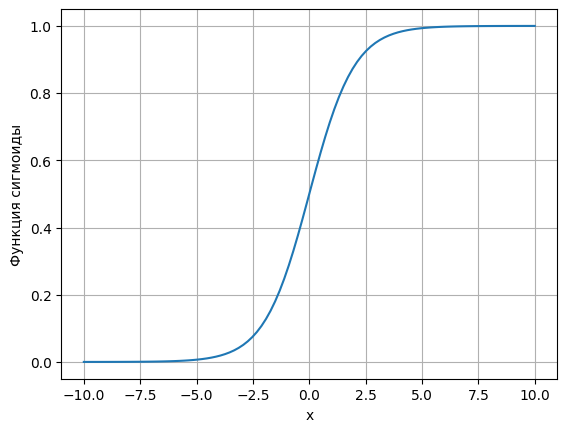

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-10, 10, 100) # linspace создает numpy array длиной 100, через равные интервалы от -10 до 10.
y = sigmoid(x)
plt.xlabel('x')
plt.ylabel('Функция сигмоиды')
plt.grid()
plt.plot(x, y)

1

In [ ]:
#Импортируем логистическую регрессию и метрику качества, точность:
from sklearn.metrics import accuracy_score, precision_score, recall_score #MSE, MAE, коэффициент детерминации R²
from sklearn.linear_model import LogisticRegression #логистическая регрессия
log_reg = LogisticRegression()

(**ложно положительные**). Это ошибка **первого рода** — ситуация, когда модель неправильно классифицирует объект как принадлежащий к какому-то классу, когда на самом деле он не принадлежит этому классу.

(**ложно отрицательные**). Это ошибка **второго рода**, также известная как **ошибка пропуска** — случай, когда модель неправильно классифицирует объект, который на самом деле принадлежит к данному классу, как не принадлежащий этому классу

**Методы оценки качества логистической регрессии**

Accuracy (Точность)  
Это метрика, которая измеряет общую точность модели в классификации. Она представляет собой отношение количества правильно классифицированных объектов ко всем объектам в выборке.

**Accuracy = (TP + TN)/(TP + TN + FP + FN)**

Precision   
Это метрика, которая измеряет точность классификации положительных примеров. Она представляет собой отношение количества правильно классифицированных положительных примеров к общему количеству всех положительных примеров, предсказанных моделью.

**Precision =  TP/(TP+FP)**

Recall  
Это метрика, которая измеряет способность модели обнаруживать все положительные примеры. Она представляет собой отношение количества правильно классифицированных положительных примеров к общему количеству истинных положительных примеров в выборке.

**Recall = TP/(TP + FN)**

**Accuracy измеряет общую правильность классификации,  
Precision и Recall оценивают точность и полноту классификации в контексте положительного класса.**

**LinearRegression**  
Этот класс представляет собой модель простой линейной регрессии, которая пытается установить линейную зависимость между одним или несколькими признаками и целевой переменной.  
**LogisticRegression**  
Этот класс реализует модель логистической регрессии, которая используется для бинарной классификации (предсказание принадлежности к одной из двух категорий) и многоклассовой классификации.

Accuracy_score  
Вычисляет Accuracy — отношение количества правильно классифицированных объектов ко всем объектам в выборке.  
Precision_score  
Вычисляет Precision — отношение количества правильно классифицированных положительных примеров к общему количеству положительных примеров, предсказанных моделью.  
Recall_score    
Вычисляет Recall — отношение количества правильно классифицированных положительных примеров к общему количеству истинных положительных примеров в выборке.  
Mean_squared_error  
Вычисляет среднеквадратичную ошибку между фактическими и предсказанными значениями.  
Mean_absolute_error  
Рассчитывает среднюю абсолютную ошибку между фактическими и предсказанными значениями.  
R2_score  
Оценивает долю объясненной дисперсии в данных, которую модель смогла объяснить.  

# 6.1 
## Task_1

In [11]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df=pd.read_csv('Lesson_4_insurance.csv')

model = LinearRegression()
X=df[['age', 'sex' ,'bmi' ,'children', 'smoker' , 'Unknown', 'northeast', 'northwest', 'southeast', 'southwest']]
Y=df['charges']

In [12]:
X.shape

(1386, 10)

In [13]:
test_split_index = int(X.shape[0]*0.7)#делим в пропорции 70/30

X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

In [14]:
#Обучим модель с использованием метода fit():
model.fit(X_train, Y_train)
#Рассчитаем Y для тестовой выборки:
Y_predicted = model.predict(X_test)
print(Y_predicted)

[ 26807.42544248  35188.6986915   23010.64975565  10364.40893198
    362.5947081   10091.0157561    8159.23043285   5376.38416853
  12850.32523709   6646.776272     2354.18366699  25723.76965348
   5545.94204927  17303.48015189  32296.22176574 -11579.84472778
   7499.40309124   4257.6837886   10054.48267817  26737.61097208
  13077.1866428   11384.45070382   5108.07667122   6822.59461225
   5841.78505791  32097.41671589   2443.80872843   9557.02209654
  22189.12641592  10386.90169722  13961.92528265  22847.15574934
  32998.86937843   7170.70992      5656.96597434  11882.73448679
  29639.55523071  12271.4317792   12062.70613605   9892.86662858
  14609.014755    13557.26524893  28842.05717627  13411.14035479
  13741.95542458  20896.61944092  11803.50289224   8376.33766628
  28638.72484385   5847.39394068  12182.74490758  14268.67352384
   2867.44313231  10418.38232275   7898.00933465  15529.03801898
  12628.60190595  13315.00137755  37125.13190936  15748.54485983
   9831.11185292  11785.2

In [15]:
print(mean_squared_error(Y_test, Y_predicted))
print(mean_absolute_error(Y_test, Y_predicted))
print(r2_score(Y_test, Y_predicted))

59939558.37594119
5300.420128837568
0.656321282950848


## Task_2

In [17]:
import pandas as pd 
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score #MSE, MAE, коэффициент детерминации R²
from sklearn.linear_model import LogisticRegression #логистическая регрессия

df=pd.read_csv('credit_data.csv')

model = LogisticRegression()
X=df[['Возраст','Доход','Кредитный рейтинг','Сумма кредита','Срок кредита']]
Y=df['Дефолт']

test_split_index = int(X.shape[0]*0.75)#делим в пропорции 70/30

X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

#Обучим модель с использованием метода fit():
model.fit(X_train, Y_train)
#Рассчитаем Y для тестовой выборки:
Y_predicted = model.predict(X_test)
print(Y_predicted)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [18]:
print(accuracy_score(Y_test, Y_predicted))
print(precision_score(Y_test, Y_predicted)) #верные положительные значения от модели
print(recall_score(Y_test, Y_predicted)) #верные положительные значения от истенных

0.74
0.5
0.15384615384615385
